In [1]:
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
df = pd.read_csv('student-mat.csv', sep = ';', header=0)

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.astype('str')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
df1 = pd.read_csv('student-por.csv', sep = ';', header=0)
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
df1.astype('str')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
grade = []
for x in df["G3"]:
    
    if x > 15:
        grade.append(4)
    elif x >= 10:
        grade.append(3)
    elif x >= 5:
        grade.append(2)
    else:
        grade.append(1)
print(grade)


[2, 2, 3, 3, 3, 3, 3, 2, 4, 3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 2, 3, 3, 3, 3, 3, 4, 4, 3, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 2, 2, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 2, 2, 3, 3, 3, 2, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 4, 3, 2, 4, 3, 2, 4, 3, 4, 4, 3, 3, 4, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 1, 4, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 2, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3, 1, 2, 1, 3, 2, 3, 3, 4, 1, 3, 1, 4, 3, 1, 2, 2, 3, 2, 2, 3, 2, 3, 4, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 1, 4, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 4, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 1, 4, 2, 3, 2, 1, 4, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 2, 3, 4, 3, 3, 3, 4, 3, 3, 4, 2, 3, 3, 1, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 2, 3, 2, 3, 1, 

In [8]:
df["grade"] = grade
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,2
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,4
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,2
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,3


In [9]:
new_df = df.drop(columns = ["G2","G1","G3"])
new_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,2
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,4
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,2
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,3


In [10]:
data = new_df.values
X = new_df.drop(columns =["grade"])
y = new_df['grade']
y

0      2
1      2
2      3
3      3
4      3
      ..
390    2
391    4
392    2
393    3
394    2
Name: grade, Length: 395, dtype: int64

In [11]:
cat_columns = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
cat_columns2 = ["absences","age","health","Walc","goout"]
cat_columns2

['absences', 'age', 'health', 'Walc', 'goout']

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()

In [13]:
X[cat_columns] = X[cat_columns].apply(LabelEncoder().fit_transform)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,1,0,0,5,5,4,4,5,4,11
391,1,1,17,1,1,1,3,1,3,3,...,1,1,0,2,4,5,3,4,2,3
392,1,1,21,0,0,1,1,1,2,2,...,1,0,0,5,5,3,3,3,3,3
393,1,1,18,0,1,1,3,2,3,2,...,1,1,0,4,4,1,3,4,5,0


In [14]:
X2= X[cat_columns2]
X2= X2.apply(LabelEncoder().fit_transform)

In [15]:
X2

,absences,age,health,Walc,goout
0,6,3,2,0,3
1,4,2,2,0,2
2,10,0,2,2,1
3,2,0,4,0,1
4,4,1,4,1,1
...,...,...,...,...,...
390,11,5,3,4,3
391,3,2,1,3,4
392,3,6,2,2,2
393,0,3,4,3,0


In [16]:
y

0      2
1      2
2      3
3      3
4      3
      ..
390    2
391    4
392    2
393    3
394    2
Name: grade, Length: 395, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
y_test

146    1
379    3
247    2
197    3
368    3
      ..
242    1
106    2
191    2
82     2
364    3
Name: grade, Length: 99, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
classifier.fit(X_train, y_train)

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6858108108108109
Testing Data Score: 0.6363636363636364


In [22]:
predictions = classifier.predict(X_test)
predictions_table=pd.DataFrame({"Predictions": predictions, "Actual": y_test})

In [23]:
predictions_table

,Predictions,Actual
146,1,1
379,3,3
247,2,2
197,3,3
368,3,3
...,...,...
242,4,1
106,3,2
191,3,2
82,3,2


In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.48484848484848486

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6868686868686869

In [26]:
feature_names= X.columns

In [27]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10688792128016585, 'absences'),
 (0.05457218703880371, 'goout'),
 (0.05327390873114196, 'Mjob'),
 (0.05319349819487217, 'age'),
 (0.04868275816530919, 'freetime'),
 (0.045738810519820344, 'health'),
 (0.044183676679959, 'Fjob'),
 (0.04215349467002452, 'Medu'),
 (0.04198261464401955, 'Walc'),
 (0.041788936027123934, 'failures'),
 (0.04104442041831859, 'Fedu'),
 (0.03957534542858583, 'famrel'),
 (0.039472728578429504, 'studytime'),
 (0.038797469791218536, 'reason'),
 (0.02841749805463674, 'traveltime'),
 (0.026400380439102197, 'paid'),
 (0.02632330609434317, 'guardian'),
 (0.024927807184189753, 'activities'),
 (0.023143701584229667, 'famsup'),
 (0.02272304303491289, 'Dalc'),
 (0.01999143708189925, 'schoolsup'),
 (0.019577247221129822, 'sex'),
 (0.01903908129368146, 'romantic'),
 (0.016986729336648757, 'famsize'),
 (0.016632746989983717, 'address'),
 (0.01631870343281143, 'nursery'),
 (0.013540658791819116, 'internet'),
 (0.012561339274772574, 'Pstatus'),
 (0.011611698390197423, 'scho

In [28]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=1)

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
classifier.fit(X2_train, y2_train)

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
print(f"Training 2 Data Score: {classifier.score(X2_train, y2_train)}")
print(f"Testing 2 Data Score: {classifier.score(X2_test, y2_test)}")

Training 2 Data Score: 0.5675675675675675
Testing 2 Data Score: 0.6868686868686869


In [32]:
predictions2 = classifier.predict(X2_test)
predictions_table2=pd.DataFrame({"Predictions": predictions2, "Actual": y2_test})

In [33]:
predictions_table2

,Predictions,Actual
146,3,1
379,3,3
247,2,2
197,3,3
368,3,3
...,...,...
242,3,1
106,3,2
191,3,2
82,3,2


In [34]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X2_train, y2_train)
clf2.score(X2_test, y2_test)

0.5454545454545454

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=200)
rf2 = rf2.fit(X2_train, y2_train)
rf2.score(X2_test, y2_test)

0.5959595959595959

In [36]:
feature_names2= X2.columns
sorted(zip(rf2.feature_importances_, feature_names2), reverse=True)

[(0.29745888666046444, 'absences'),
 (0.19039374056446975, 'age'),
 (0.17695123939053492, 'health'),
 (0.1769466378890618, 'goout'),
 (0.15824949549546927, 'Walc')]

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X2_train)

In [38]:
X_train_scaled = X_scaler.transform(X2_train)
X_test_scaled = X_scaler.transform(X2_test)

In [39]:
train_scores = []
test_scores = []
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y2_train)
    train_score = knn.score(X_train_scaled, y2_train)
    test_score = knn.score(X_test_scaled, y2_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.946/0.444
k: 3, Train/Test Score: 0.676/0.495
k: 5, Train/Test Score: 0.601/0.525
k: 7, Train/Test Score: 0.578/0.556
k: 9, Train/Test Score: 0.581/0.566
k: 11, Train/Test Score: 0.554/0.636
k: 13, Train/Test Score: 0.561/0.646
k: 15, Train/Test Score: 0.571/0.646
k: 17, Train/Test Score: 0.557/0.646
k: 19, Train/Test Score: 0.554/0.636
k: 21, Train/Test Score: 0.561/0.636
k: 23, Train/Test Score: 0.547/0.626
k: 25, Train/Test Score: 0.547/0.616
k: 27, Train/Test Score: 0.551/0.606
k: 29, Train/Test Score: 0.551/0.626
k: 31, Train/Test Score: 0.557/0.626
k: 33, Train/Test Score: 0.554/0.626


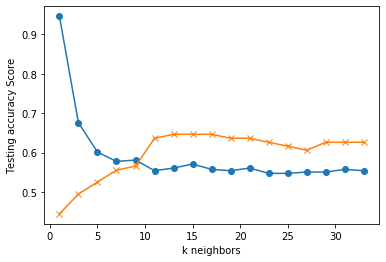

In [40]:
plt.plot(range(1, 35, 2), train_scores, marker='o')
plt.plot(range(1, 35, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.566
